**Click on File and save a copy in Drive.**

### **Aim**  
The goal of this assignment is to make predictions using linear regression. We will be implementing the linear regression model from scratch. We have been provided with a hypothetical dataset of a company that wants to predict the price of a car. Our task is to build a linear regression model that can accurately predict the price of a car based on the given features in dataset.                                  
**NOTE:** Data is hypothetical price of the car may be negative.

Import Libraries.

In [ ]:
#importing libraries
import pandas as pd
import numpy as np

### Generating the dataset  
Run the cell below to load the dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1kjUHAjfl2FGx5tZ219EzyOJiAwTsqjbO

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1kjUHAjfl2FGx5tZ219EzyOJiAwTsqjbO
To: /content/car_dataa.csv
100% 34.2k/34.2k [00:00<00:00, 50.4MB/s]


In [ ]:
df=pd.read_csv('/content/car_dataa.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,-0.860155,-94.188683,-0.410123,0.612850,Petrol,Dealer,Manual,0
1,sx4,-0.097043,15.276170,0.647960,-1.874549,Diesel,Dealer,Manual,0
2,ciaz,-0.402870,69.755387,0.457906,2.125322,Petrol,Dealer,Manual,0
3,wagon r,-0.480849,-61.144535,-0.079979,0.038635,Petrol,Dealer,Manual,0
4,swift,-2.223520,-40.620491,1.898574,-0.468699,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,1.007247,20.693798,-1.083003,-0.229690,Diesel,Dealer,Manual,0
297,brio,1.721243,87.938514,-0.859128,0.378223,Petrol,Dealer,Manual,0
298,city,-0.171465,-154.588890,-0.944369,-0.495819,Petrol,Dealer,Manual,0
299,city,-0.605274,171.969714,2.360360,-0.057051,Diesel,Dealer,Manual,0


Delete Unwanted Columns like Car_Name, Fuel_Type, Seller_Type, Owner, Transmission. Use del function:- del df['Car_Name'] deletes that column.

In [ ]:
del df['Car_Name']
del df['Fuel_Type']
del df['Seller_Type']
del df['Owner']
del df['Transmission']

Take out Selling price as y and other column as X

In [ ]:
X = df.drop(['Selling_Price'],axis=1)
y = df['Selling_Price']

In [ ]:
#Check the shape of X
X.shape

(301, 3)

In [ ]:
#Check the shape of y
y.shape

(301,)

In [ ]:
#print X and check
X

,Year,Present_Price,Kms_Driven
0,-0.860155,-0.410123,0.612850
1,-0.097043,0.647960,-1.874549
2,-0.402870,0.457906,2.125322
3,-0.480849,-0.079979,0.038635
4,-2.223520,1.898574,-0.468699
...,...,...,...
296,1.007247,-1.083003,-0.229690
297,1.721243,-0.859128,0.378223
298,-0.171465,-0.944369,-0.495819
299,-0.605274,2.360360,-0.057051


In [ ]:
# print y and check
y

0      -94.188683
1       15.276170
2       69.755387
3      -61.144535
4      -40.620491
          ...    
296     20.693798
297     87.938514
298   -154.588890
299    171.969714
300     35.857232
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
#Divide data into train and test using train_test_split
from sklearn import datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
#find shape of X
X.shape

(301, 3)

In [ ]:
#find shape of y
y.shape

(301,)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

Text(0.5, 1.0, 'Kms_Driven vs Selling Price')

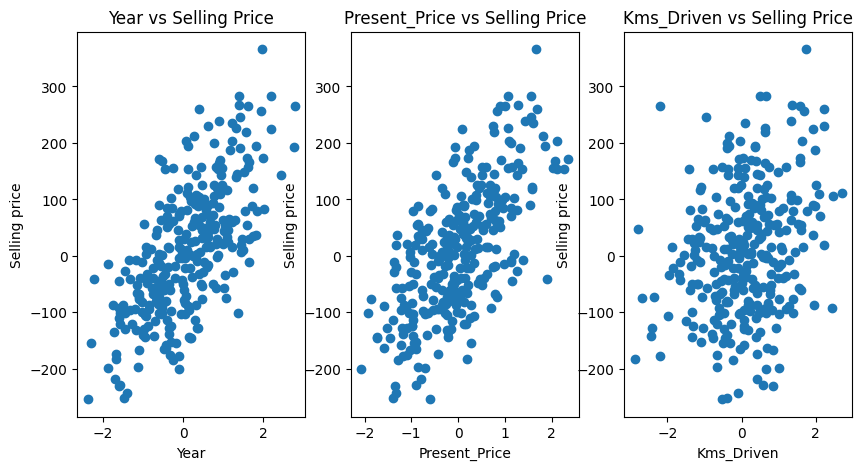

In [ ]:
import matplotlib.pyplot as plt


# Your code here
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

axes[0].scatter(X['Year'],y)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Selling price')
axes[0].set_title('Year vs Selling Price')

axes[1].scatter(X['Present_Price'],y)
axes[1].set_xlabel('Present_Price')
axes[1].set_ylabel('Selling price')
axes[1].set_title('Present_Price vs Selling Price')

axes[2].scatter(X['Kms_Driven'],y)
axes[2].set_xlabel('Kms_Driven')
axes[2].set_ylabel('Selling price')
axes[2].set_title('Kms_Driven vs Selling Price')


You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [ ]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr=learning_rate
        self.n_iters=n_iters

    # The following function would be the heart of the model. This is where the training would happen.
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):

        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent

        for i in range(self.n_iters):
         y_predicted = np.dot(X,self.weights) + self.bias

         dw = (2/n_samples)*(np.dot(X.T,(y_predicted - y)))
         db = (1 / n_samples) * np.sum(y_predicted - y)

         self.weights = self.weights - self.lr * dw
         self.bias = self.bias - self.lr * db






    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
        y_approximated = np.dot(X , self.weights) + self.bias
        return y_approximated







### Initializing, Training & Predictions

In [ ]:
# Now, we make an object of our custom class.
regressor = LinearRegression(learning_rate=0.01, n_iters=1000) # You may pass the custom parameters or let the default values take it ahead

# Call the fit method on the object to train (pass appropriate part of dataset)
regressor.fit( X_train, y_train)

# Now, let's see our what our model predicts # pass appropriate part of dataset
y_pred = regressor.predict(X_test)


### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [ ]:
def mean_squared_error(y_true, y_pred):

  mse = ((y_true - y_pred)**2).mean()
  return mse


def r2_score(y_true, y_pred):

  ssr = ((y_true - y_pred)**2).sum()

  y_mean = y_true.mean()
  sst = ((y_true - y_mean)**2).sum()

  r2 = 1 - (ssr/sst)

    # return the r2 score
  return r2


mse =  mean_squared_error(y_test, y_pred)
print("MSE:", mse)

accu = r2_score(y_test, y_pred)
print("Accuracy:", accu)

MSE: 318.2217111795415
Accuracy: 0.9781242530345833


In [ ]:
#Print first 10 values of prediction and y_test
print("Y_test\n",y_test.head(10),"\n")
print("Y_preditions\n",pd.Series(y_pred).head(10))

Y_test
 92     125.948842
162     21.541047
225      1.227178
155    -86.154698
108    154.153259
134      6.359070
40     219.995546
208   -139.070368
270    167.017709
106    -60.251874
Name: Selling_Price, dtype: float64 

Y_preditions
 0    120.607753
1     22.696771
2    -13.907388
3    -66.260223
4    156.744556
5     25.209152
6    206.355089
7   -152.483279
8    153.217436
9    -23.131819
dtype: float64


[Please click on this link to access subjective questions](https://docs.google.com/document/d/1wgM6qO6w1QQbcC74Wt58wlScT8uUa9U5rLdDNT99FXE/edit?usp=sharing)